# An Analysis of Cardiovascular Factors in relation to Heart Attack Prediction

## Research Question:
Which measured cardiovascular factor is most closely correlated with heart attack occurence?

## Data Dictionary: 
age - age of patient in years                                                                                                                                 
sex - 1 = male, 0 = female                                                                                                                                     
cp - chest pain type: 0: asymptomatic, 1: typical angina, 2: atypical angina, 3: non-anginal pain                                                             
trestbps - resting blood pressure in mmHg                                                                                                                     
chol - serum cholesterol in mg/dL                                                                                                                             
fbs - fasting blood sugar > 120. 1 = true, 0 = false                                                                                                           
restecg - electrocardiogram results: 0:Normal, 1:ST-T wave abnormality, 2:left ventricular hypertrophy                                                         
max_hr - greatest heart rate achievable through strenuous exercise in bpm                                                                                     
exang - exercise induced angina - 1: yes, 2: no                                                                                                               
oldpeak - ST depression induced by exercise relative to rest in mm                                                                                             
slope - the slope of the peak exercise ST segment - 1: upsloping, 2: flat, 3: downsloping                                                                     
blocked_vessels - number of major vessels colored by fluoroscopy, indicating a degree of clogging in the vessel.                                               
thal - thallium absorption - 1:Normal, 2:fixed defect, 3:reversible defect. A fixed defect indicates scarring in myocardial tissue.

heart_attack - 1: Inividual had a heart attack, 0: individual did not have a heart attack

# ____________________________________________________________________________

#### Importing packages for future use

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from scipy import stats

# ____________________________________________________________________________

## Reading in Data

In [2]:
os.getcwd()

'/Users/adam/Desktop/Data Science/Project'

In [3]:
os.chdir('/Users/adam/Desktop/Data Science/Project')

In [42]:
df = pd.read_csv('Heart Attack Data Set.csv')

In [43]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Renaming some columns to more accurately represent the variables:

In [44]:
df2 = df.rename(columns = {'target':'heart_attack', 'trestbps':'rest_bp', 'thalach':'max_hr', 'restecg':'ecg', 'slope':'st_slope', 
                           'ca':'blocked_vessels', 'oldpeak':'st_depression'})


In [56]:
df2

,age,sex,cp,rest_bp,chol,fbs,ecg,max_hr,exang,st_depression,st_slope,blocked_vessels,thal,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Checking data types of the variables

In [54]:
df2.dtypes

age                  int64
sex                  int64
cp                   int64
rest_bp              int64
chol                 int64
fbs                  int64
ecg                  int64
max_hr               int64
exang                int64
st_depression      float64
st_slope             int64
blocked_vessels      int64
thal                 int64
heart_attack         int64
dtype: object

# ____________________________________________________________________________

### Exploring heart attack versus no heart attack: Creating two new datasets to compare other variables between them 
        - df_ha includes all rows where the individual had a heart attack
        - df_noha includes all rows where the individual did not have a heart attack 

In [55]:
df2['heart_attack'].value_counts()

1    165
0    138
Name: heart_attack, dtype: int64

In [47]:
df_ha = df2.loc[df2['heart_attack'] == 1]
df_noha = df2.loc[df2['heart_attack'] == 0]

# ____________________________________________________________________________

## Defining Functions 
    - exploration_categorical is to be used for columns that are categorical variables
        - takes column name as input
        - outputs
            - value counts for the variable in both the heart attack and no heart attack data sets
            - A color-coded histogram to visually compare frequencies of the values across the data sets
            - the results of a chi-square test, indicating correlation with heart attack occurence because it measures the difference between the expected frequencies and the observed. 
    - exploration_continuous is to be used for columns that are continuous variables 
        - takes column name as input
        - outputs
            - summary statistics for the variable in the heart attack dataset versus non-heart attack data set 
            - a side by side box plot for the variable in the two data sets
            - the results of a two sample T-test, indicating correlation with heart attack occurence because it measures the probablity that the difference in means across the two groups is due to chance

In [49]:
def exploration_categorical(categorical_col):
    contingency_table = pd.crosstab(df2[categorical_col], df2['heart_attack'])
    return ("Heart Attack:", df_ha[categorical_col].value_counts(),"No Heart Attack:",df_noha[categorical_col].value_counts(), 
            '----------------------------------', 
            plt.hist(df_ha[categorical_col], alpha = 0.5, label = 'Heart Attack'), plt.hist(df_noha[categorical_col], alpha = 0.5,
            label = 'No Heart Attack'),plt.legend(loc='upper left'),
            '----------------------------------', 
            stats.chi2_contingency(contingency_table))

def exploration_continuous(continuous_col):
    both = (df_ha[continuous_col], df_noha[continuous_col])
    return ("Heart Attack:", df_ha[continuous_col].describe(), "No Heart Attack:", df_noha[continuous_col].describe(),
            '----------------------------------',
            plt.boxplot(both, labels = ['Heart Attack', 'No Heart Attack']), 
            '----------------------------------', 
            stats.ttest_ind(df_ha[continuous_col], df_noha[continuous_col]))
        
    
        

# ____________________________________________________________________________

## Unit Testing
    - [Insert sentence or two about the unit tests]

None


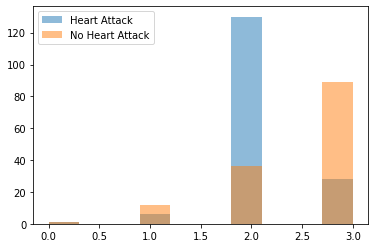

In [63]:
from unittest import TestCase
 
tc = TestCase()
 
print(tc.assertEqual(exploration_categorical('thal')[1][2], 130))


None


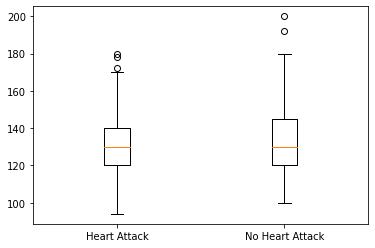

In [64]:
print(tc.assertEqual(exploration_continuous('rest_bp')[1][0], 165.0))

# ____________________________________________________________________________

## Data Processing

### Sex

('Heart Attack:',
 1    93
 0    72
 Name: sex, dtype: int64,
 'No Heart Attack:',
 1    114
 0     24
 Name: sex, dtype: int64,
 '----------------------------------',
 (array([72.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 93.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 (array([ 24.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 114.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 '----------------------------------',
 (22.717227046576355,
  1.8767776216941503e-06,
  1,
  array([[ 43.72277228,  52.27722772],
         [ 94.27722772, 112.72277228]])))

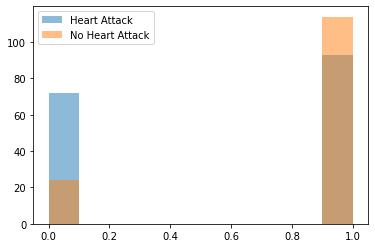

In [60]:
exploration_categorical('sex')

### P-Value: = 1.877e-6

# ---------------------------------------------------------

### Chest Pain

('Heart Attack:',
 2    69
 1    41
 0    39
 3    16
 Name: cp, dtype: int64,
 'No Heart Attack:',
 0    104
 2     18
 1      9
 3      7
 Name: cp, dtype: int64,
 '----------------------------------',
 (array([39.,  0.,  0., 41.,  0.,  0., 69.,  0.,  0., 16.]),
  array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
  <BarContainer object of 10 artists>),
 (array([104.,   0.,   0.,   9.,   0.,   0.,  18.,   0.,   0.,   7.]),
  array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
  <BarContainer object of 10 artists>),
 '----------------------------------',
 (81.68642755194445,
  1.3343043373050064e-17,
  3,
  array([[65.12871287, 77.87128713],
         [22.77227723, 27.22772277],
         [39.62376238, 47.37623762],
         [10.47524752, 12.52475248]])))

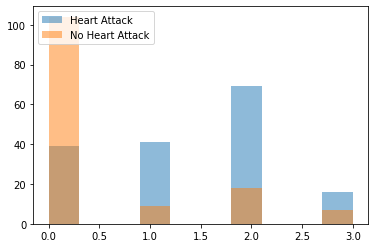

In [27]:
exploration_categorical('cp')

### P-Value = 1.334e-17

# ---------------------------------------------------------

### Fasting Blood Sugar 

('Heart Attack:',
 0    142
 1     23
 Name: fbs, dtype: int64,
 'No Heart Attack:',
 0    116
 1     22
 Name: fbs, dtype: int64,
 '----------------------------------',
 (array([142.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 (array([116.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 '----------------------------------',
 (0.10627276301947715,
  0.7444281114149577,
  1,
  array([[117.5049505, 140.4950495],
         [ 20.4950495,  24.5049505]])))

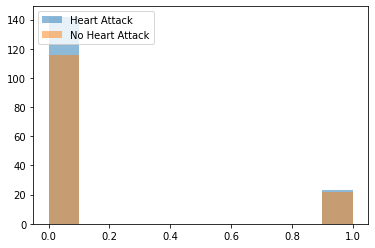

In [28]:
exploration_categorical('fbs')

### P-Value = 0.744

# ---------------------------------------------------------

### Electrocardiogram Results

('Heart Attack:',
 1    96
 0    68
 2     1
 Name: ecg, dtype: int64,
 'No Heart Attack:',
 0    79
 1    56
 2     3
 Name: ecg, dtype: int64,
 '----------------------------------',
 (array([68.,  0.,  0.,  0.,  0., 96.,  0.,  0.,  0.,  1.]),
  array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
  <BarContainer object of 10 artists>),
 (array([79.,  0.,  0.,  0.,  0., 56.,  0.,  0.,  0.,  3.]),
  array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
  <BarContainer object of 10 artists>),
 '----------------------------------',
 (10.023091785081,
  0.006660598773498031,
  2,
  array([[66.95049505, 80.04950495],
         [69.22772277, 82.77227723],
         [ 1.82178218,  2.17821782]])))

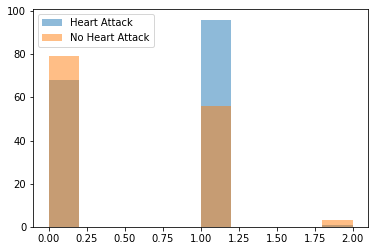

In [29]:
exploration_categorical('ecg')

### P-Value = 0.007

# ---------------------------------------------------------

### Exercise Angina 

('Heart Attack:',
 0    142
 1     23
 Name: exang, dtype: int64,
 'No Heart Attack:',
 1    76
 0    62
 Name: exang, dtype: int64,
 '----------------------------------',
 (array([142.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 (array([62.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 '----------------------------------',
 (55.94454996665093,
  7.454409331235655e-14,
  1,
  array([[ 92.91089109, 111.08910891],
         [ 45.08910891,  53.91089109]])))

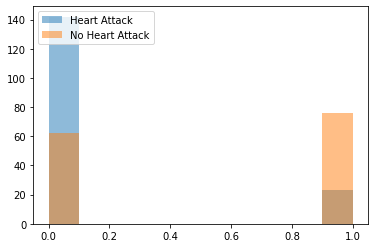

In [30]:
exploration_categorical('exang')

### P-Value = 7.454e-14

# ---------------------------------------------------------

### S-T Slope 

('Heart Attack:',
 2    107
 1     49
 0      9
 Name: st_slope, dtype: int64,
 'No Heart Attack:',
 1    91
 2    35
 0    12
 Name: st_slope, dtype: int64,
 '----------------------------------',
 (array([  9.,   0.,   0.,   0.,   0.,  49.,   0.,   0.,   0., 107.]),
  array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
  <BarContainer object of 10 artists>),
 (array([12.,  0.,  0.,  0.,  0., 91.,  0.,  0.,  0., 35.]),
  array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
  <BarContainer object of 10 artists>),
 '----------------------------------',
 (47.506896756030244,
  4.830681934276837e-11,
  2,
  array([[ 9.56435644, 11.43564356],
         [63.76237624, 76.23762376],
         [64.67326733, 77.32673267]])))

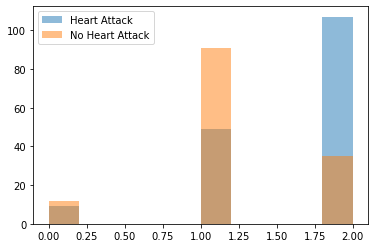

In [31]:
exploration_categorical('st_slope')

### P-Value = 4.83e-11

# ---------------------------------------------------------

### Thallium Absorption

('Heart Attack:',
 2    130
 3     28
 1      6
 0      1
 Name: thal, dtype: int64,
 'No Heart Attack:',
 3    89
 2    36
 1    12
 0     1
 Name: thal, dtype: int64,
 '----------------------------------',
 (array([  1.,   0.,   0.,   6.,   0.,   0., 130.,   0.,   0.,  28.]),
  array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
  <BarContainer object of 10 artists>),
 (array([ 1.,  0.,  0., 12.,  0.,  0., 36.,  0.,  0., 89.]),
  array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
  <BarContainer object of 10 artists>),
 '----------------------------------',
 (85.30373951466147,
  2.2333507210129364e-18,
  3,
  array([[ 0.91089109,  1.08910891],
         [ 8.1980198 ,  9.8019802 ],
         [75.6039604 , 90.3960396 ],
         [53.28712871, 63.71287129]])))

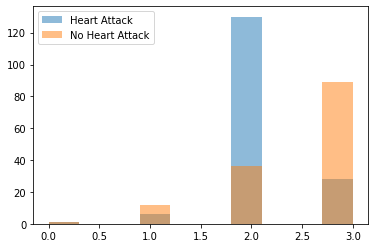

In [32]:
exploration_categorical('thal')

### P-Value = 2.233e-18

# ---------------------------------------------------------

### Age

('Heart Attack:',
 count    165.000000
 mean      52.496970
 std        9.550651
 min       29.000000
 25%       44.000000
 50%       52.000000
 75%       59.000000
 max       76.000000
 Name: age, dtype: float64,
 'No Heart Attack:',
 count    138.000000
 mean      56.601449
 std        7.962082
 min       35.000000
 25%       52.000000
 50%       58.000000
 75%       62.000000
 max       77.000000
 Name: age, dtype: float64,
 '----------------------------------',
 {'whiskers': [<matplotlib.lines.Line2D at 0x7fc7a8f306a0>,
  'caps': [<matplotlib.lines.Line2D at 0x7fc7a8f30dc0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7fc7a8f30310>,
  'medians': [<matplotlib.lines.Line2D at 0x7fc7a8f95550>,
  'fliers': [<matplotlib.lines.Line2D at 0x7fc7a8f958e0>,
  'means': []},
 '----------------------------------',
 Ttest_indResult(statistic=-4.014560975148874, pvalue=7.524801303442373e-05))

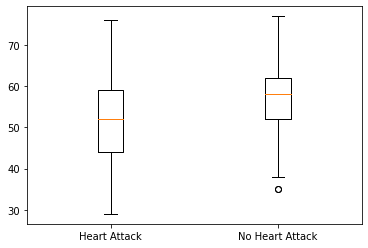

In [33]:
exploration_continuous('age')

### P-Value = 7.525e-5

# ---------------------------------------------------------

### Resting Blood Pressure

('Heart Attack:',
 count    165.000000
 mean     129.303030
 std       16.169613
 min       94.000000
 25%      120.000000
 50%      130.000000
 75%      140.000000
 max      180.000000
 Name: rest_bp, dtype: float64,
 'No Heart Attack:',
 count    138.000000
 mean     134.398551
 std       18.729944
 min      100.000000
 25%      120.000000
 50%      130.000000
 75%      144.750000
 max      200.000000
 Name: rest_bp, dtype: float64,
 '----------------------------------',
 {'whiskers': [<matplotlib.lines.Line2D at 0x7fc7a902ba60>,
  'caps': [<matplotlib.lines.Line2D at 0x7fc7a90931f0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7fc7a902b6d0>,
  'medians': [<matplotlib.lines.Line2D at 0x7fc7a9093910>,
  'fliers': [<matplotlib.lines.Line2D at 0x7fc7a9093ca0>,
  'means': []},
 '----------------------------------',
 Ttest_indResult(statistic=-2.5412927171039, pvalue=0.011546059200233312))

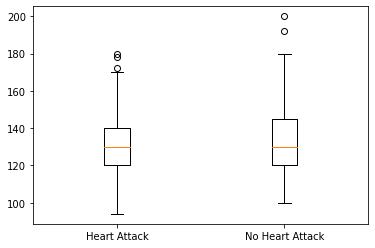

In [34]:
exploration_continuous('rest_bp')

### P-Value = 0.012

# ---------------------------------------------------------

### Cholesterol Level 

('Heart Attack:',
 count    165.000000
 mean     242.230303
 std       53.552872
 min      126.000000
 25%      208.000000
 50%      234.000000
 75%      267.000000
 max      564.000000
 Name: chol, dtype: float64,
 'No Heart Attack:',
 count    138.000000
 mean     251.086957
 std       49.454614
 min      131.000000
 25%      217.250000
 50%      249.000000
 75%      283.000000
 max      409.000000
 Name: chol, dtype: float64,
 '----------------------------------',
 {'whiskers': [<matplotlib.lines.Line2D at 0x7fc7a918e400>,
  'caps': [<matplotlib.lines.Line2D at 0x7fc7a918eb20>,
  'boxes': [<matplotlib.lines.Line2D at 0x7fc7a918e070>,
  'medians': [<matplotlib.lines.Line2D at 0x7fc7a91c6280>,
  'fliers': [<matplotlib.lines.Line2D at 0x7fc7a91c6610>,
  'means': []},
 '----------------------------------',
 Ttest_indResult(statistic=-1.4842450762526977, pvalue=0.13879032695600638))

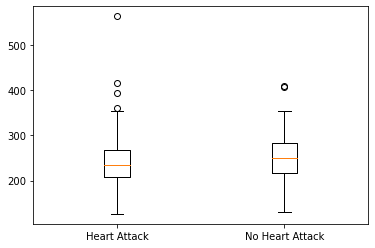

In [35]:
exploration_continuous('chol')

### P-Value = 0.139

# ---------------------------------------------------------

### Maximum Heart Rate

('Heart Attack:',
 count    165.000000
 mean     158.466667
 std       19.174276
 min       96.000000
 25%      149.000000
 50%      161.000000
 75%      172.000000
 max      202.000000
 Name: max_hr, dtype: float64,
 'No Heart Attack:',
 count    138.000000
 mean     139.101449
 std       22.598782
 min       71.000000
 25%      125.000000
 50%      142.000000
 75%      156.000000
 max      195.000000
 Name: max_hr, dtype: float64,
 '----------------------------------',
 {'whiskers': [<matplotlib.lines.Line2D at 0x7fc7a928e430>,
  'caps': [<matplotlib.lines.Line2D at 0x7fc7a928eaf0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7fc7a928e0a0>,
  'medians': [<matplotlib.lines.Line2D at 0x7fc7a929c160>,
  'fliers': [<matplotlib.lines.Line2D at 0x7fc7a929c4f0>,
  'means': []},
 '----------------------------------',
 Ttest_indResult(statistic=8.069702869452568, pvalue=1.697337638656049e-14))

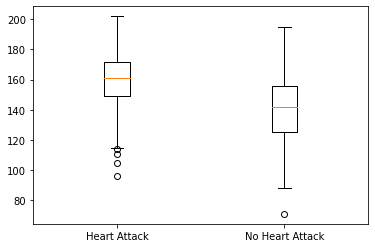

In [36]:
exploration_continuous('max_hr')

### P-Value = 1.697e-14

# ---------------------------------------------------------

### S-T Depression

('Heart Attack:',
 count    165.000000
 mean       0.583030
 std        0.780683
 min        0.000000
 25%        0.000000
 50%        0.200000
 75%        1.000000
 max        4.200000
 Name: st_depression, dtype: float64,
 'No Heart Attack:',
 count    138.000000
 mean       1.585507
 std        1.300340
 min        0.000000
 25%        0.600000
 50%        1.400000
 75%        2.500000
 max        6.200000
 Name: st_depression, dtype: float64,
 '----------------------------------',
 {'whiskers': [<matplotlib.lines.Line2D at 0x7fc7a93971f0>,
  'caps': [<matplotlib.lines.Line2D at 0x7fc7a9397940>,
  'boxes': [<matplotlib.lines.Line2D at 0x7fc7a9387e20>,
  'medians': [<matplotlib.lines.Line2D at 0x7fc7a93cf0a0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7fc7a93cf430>,
  'means': []},
 '----------------------------------',
 Ttest_indResult(statistic=-8.279579663866224, pvalue=4.085346391354538e-15))

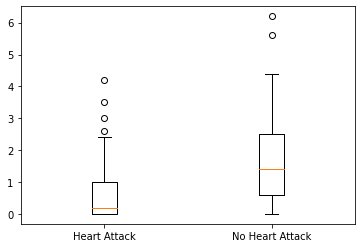

In [37]:
exploration_continuous('st_depression')

### P-Value = 4.085e-15

# ---------------------------------------------------------

### Number of Blocked Vessels

('Heart Attack:',
 count    165.000000
 mean       0.363636
 std        0.848894
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        4.000000
 Name: blocked_vessels, dtype: float64,
 'No Heart Attack:',
 count    138.000000
 mean       1.166667
 std        1.043460
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        2.000000
 max        4.000000
 Name: blocked_vessels, dtype: float64,
 '----------------------------------',
 {'whiskers': [<matplotlib.lines.Line2D at 0x7fc7a9499250>,
  'caps': [<matplotlib.lines.Line2D at 0x7fc7a9499970>,
  'boxes': [<matplotlib.lines.Line2D at 0x7fc7a948ce80>,
  'medians': [<matplotlib.lines.Line2D at 0x7fc7a94a40d0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7fc7a94a4460>,
  'means': []},
 '----------------------------------',
 Ttest_indResult(statistic=-7.386462874461026, pvalue=1.4915387381121126e-12))

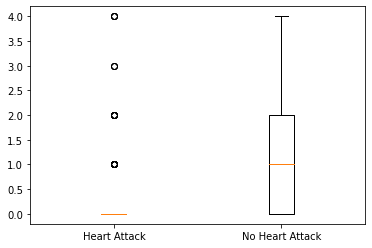

In [38]:
exploration_continuous('blocked_vessels')

### P-Value = 1.492e-12